In this project we will be answering the following questions:
    
    1. what was the change in price of stock over time?
    2. What was the daily return of stock on average?
    3. What was the moving average of the various stocks?
    4. what was the correlation between different stocks closing prices?
    5. What was the correlation between different stocks daily returns?
    6. How much value do we put at risk by investing in a particular stock?
    7. How can we attempt to predict future stock behaviour?
    

In [25]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [27]:
%matplotlib inline

In [28]:
import pandas_datareader.data as web

In [29]:
from datetime import datetime

In [30]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [31]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [32]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

Signature: globals()
Docstring:
Return the dictionary containing the current scope's global variables.

In [33]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-12-04 to 2019-12-04
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [34]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-04,182.389999,176.270004,180.949997,176.690002,41344300.0,174.074539
2018-12-06,174.779999,170.419998,171.759995,174.720001,43098400.0,172.133682
2018-12-07,174.490005,168.300003,173.490005,168.490005,42281600.0,165.995926
2018-12-10,170.089996,163.330002,165.000000,169.600006,62026000.0,167.089478
2018-12-11,171.789993,167.000000,171.660004,168.630005,47281700.0,166.133850


In [35]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-04,112.639999,108.209999,111.940002,108.519997,45197000.0,106.938789
2018-12-06,109.239998,105.000000,105.820000,109.190002,49107400.0,107.599037
2018-12-07,109.449997,104.300003,108.379997,104.820000,45044900.0,103.292702
2018-12-10,107.980003,103.889999,104.800003,107.589996,40801500.0,106.022339
2018-12-11,110.949997,107.440002,109.800003,108.589996,42381900.0,107.007774


In [36]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-04,1770.339966,1665.000000,1756.000000,1668.400024,8694500,1668.400024
2018-12-06,1701.050049,1609.849976,1614.869995,1699.189941,8789400,1699.189941
2018-12-07,1718.930054,1625.459961,1705.069946,1629.130005,7576100,1629.130005
2018-12-10,1657.989990,1590.869995,1623.839966,1641.030029,7494800,1641.030029
2018-12-11,1679.469971,1619.599976,1678.000000,1643.239990,6244700,1643.239990


In [37]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,201.695477,198.033175,199.768253,199.980357,2.934001e+07,198.568456
std,30.033454,30.118819,30.069816,30.181304,1.222335e+07,30.795758
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,177.877499,174.382504,175.572506,175.415001,2.105400e+07,173.832317
50%,201.184998,198.294998,199.579994,199.770004,2.622035e+07,198.249306
75%,216.525002,211.532497,213.937496,213.264996,3.386505e+07,212.626629
max,268.250000,265.899994,267.899994,267.839996,9.574460e+07,267.839996


In [38]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-12-04 to 2019-12-04
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


View historical view of closing price

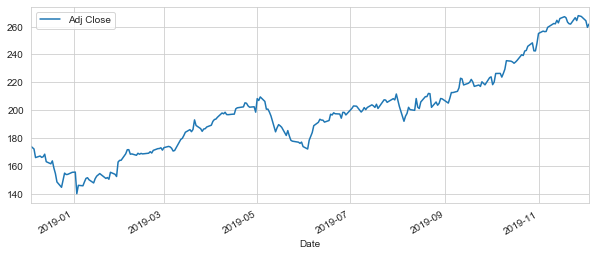

In [39]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

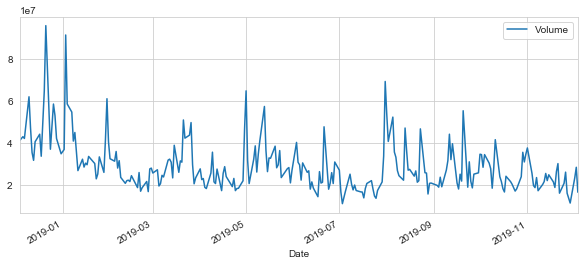

In [40]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

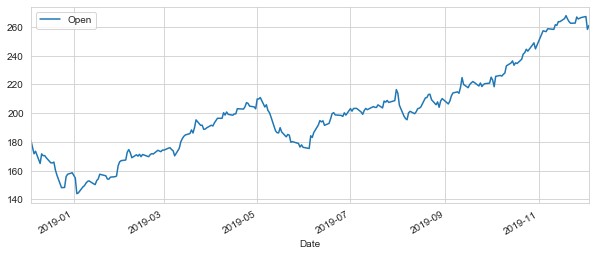

In [41]:
AAPL['Open'].plot(legend=True,figsize=(10,4))

Calculating moving average for aaple stocks for 10,20 and 50 days, more info at - https://en.wikipedia.org/wiki/Moving_average

In [44]:
ma_day = [10,20,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

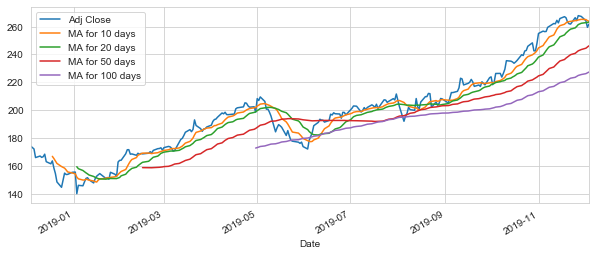

In [45]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF94FE5160>,
      dtype=object)

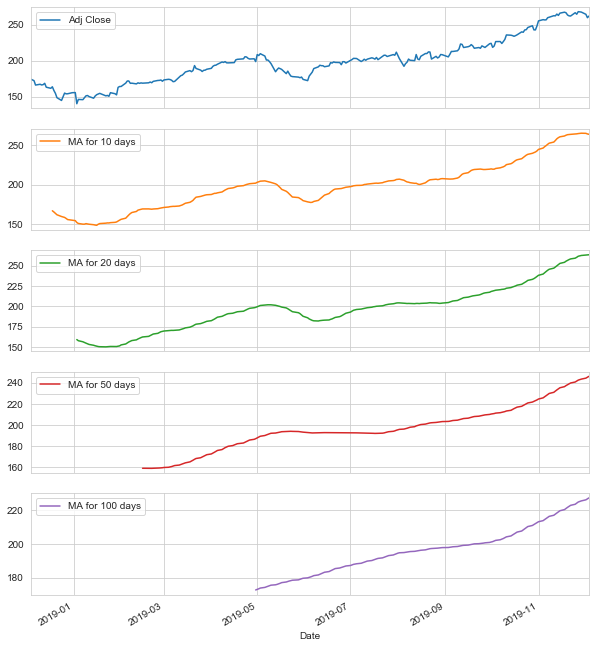

In [48]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=True,figsize=(10,12))

Plot Daily return percentage for aaple stock

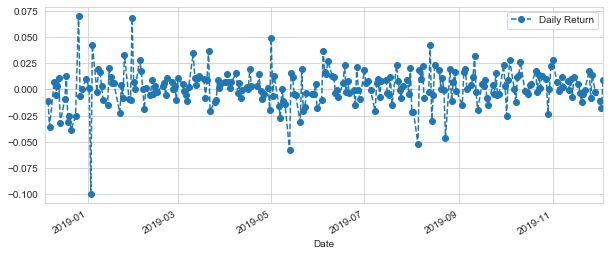

In [50]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

Average daily return

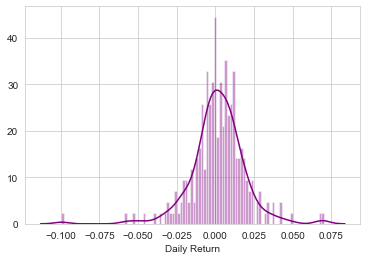

In [51]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

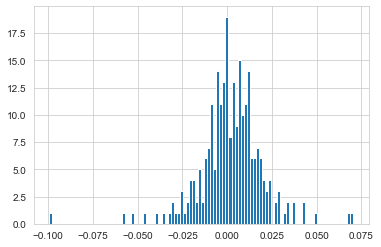

In [53]:
#same can also be done usng plt
AAPL['Daily Return'].hist(bins=100)

If we want to Analyze the returns of all stocks on our list

In [57]:
closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [58]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-04,174.074539,1668.400024,1050.819946,106.938789
2018-12-06,172.133682,1699.189941,1068.729980,107.599037
2018-12-07,165.995926,1629.130005,1036.579956,103.292702
2018-12-10,167.089478,1641.030029,1039.550049,106.022339
2018-12-11,166.133850,1643.239990,1051.750000,107.007774


In [59]:
tech_rets = closing_df.pct_change()

In [60]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-04,NaN,NaN,NaN,NaN
2018-12-06,-0.011150,0.018455,0.017044,0.006174
2018-12-07,-0.035657,-0.041231,-0.030082,-0.040022
2018-12-10,0.006588,0.007305,0.002865,0.026426
2018-12-11,-0.005719,0.001347,0.011736,0.009295


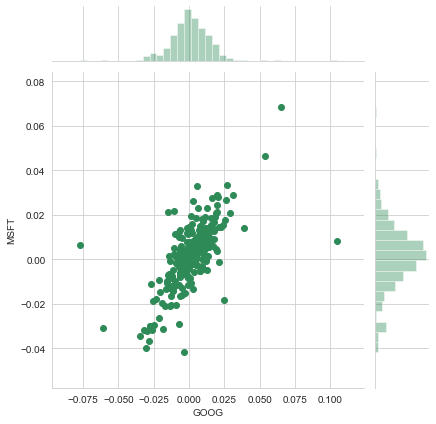

In [64]:
sns.jointplot('GOOG','MSFT',tech_rets,color='seagreen')

graph above shows how the daily percentage returns are. you can find more info at https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [65]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-04,NaN,NaN,NaN,NaN
2018-12-06,-0.011150,0.018455,0.017044,0.006174
2018-12-07,-0.035657,-0.041231,-0.030082,-0.040022
2018-12-10,0.006588,0.007305,0.002865,0.026426
2018-12-11,-0.005719,0.001347,0.011736,0.009295


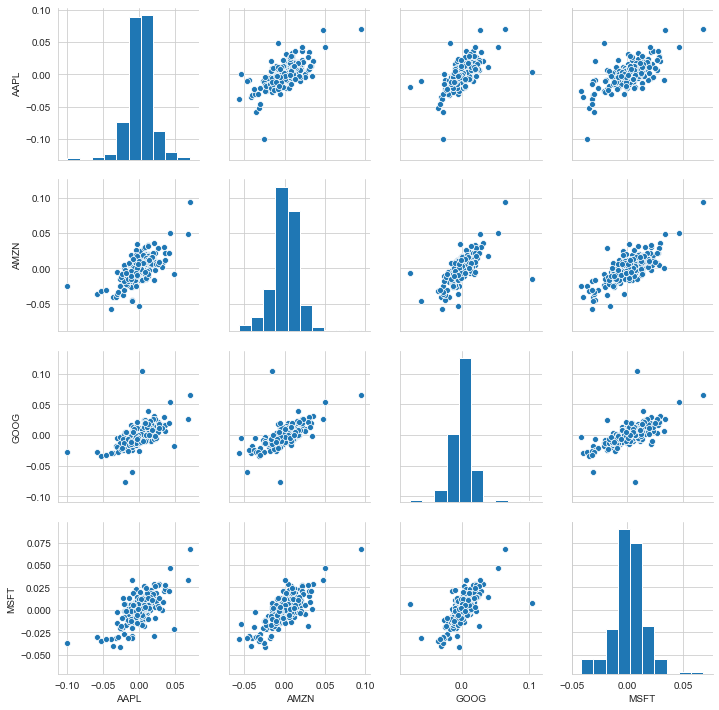

In [66]:
sns.pairplot(tech_rets.dropna())

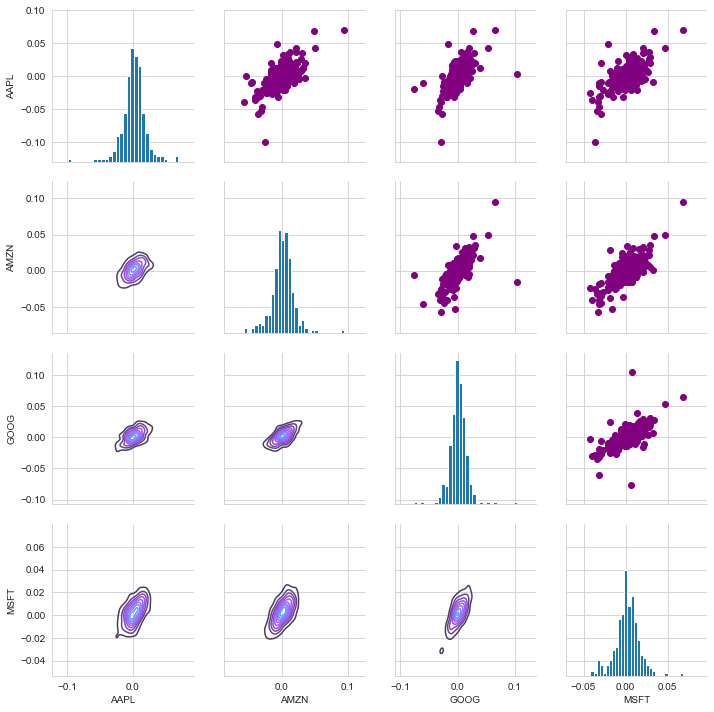

In [67]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

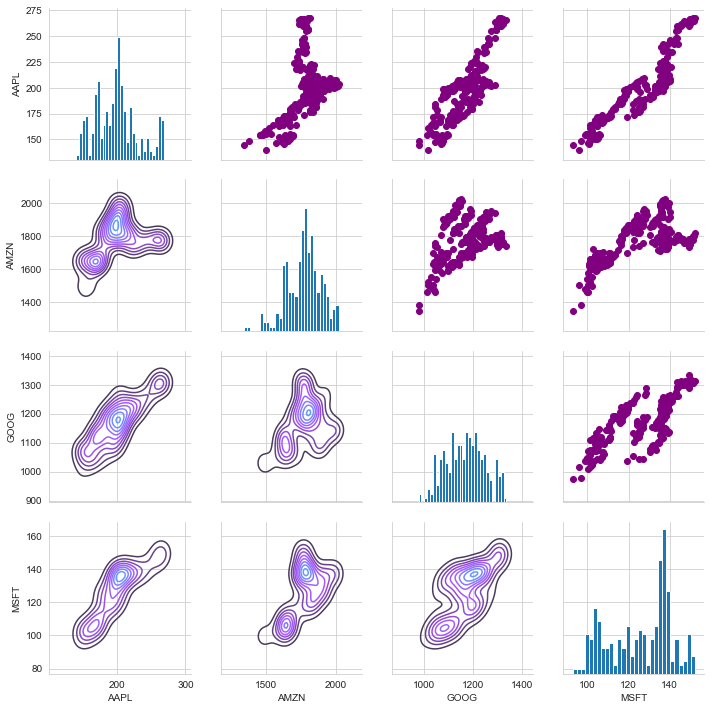

In [68]:
return_fig = sns.PairGrid(closing_df.dropna())

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

Quantifying risk

There are many ways we quantify risks, one method is to compre expected return with standard deviation of daily returns

In [81]:
rets = tech_rets.dropna()

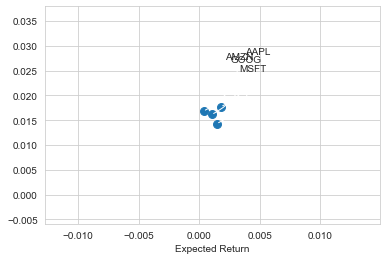

In [83]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel=('Risk')


for label , x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, 
                 xy=(x,y), xytext = (50,50),
                 textcoords = 'offset points', ha='right',va = 'bottom',
                 arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))